### Trabalho Prático

##### Alunos

- Arnaldo Antônio Inácio Silva
- Eduardo Henrique Pessoa Alves
- Gabriel Mendes Oliveira Pedrosa da Costa 
- Lucas Freitas de Barros

##### Disciplina

Processamento Digital de Imagem

### Objetivo

Criar um sistema para abrir, manipular e salvar imagens RGB com 24 bits/pixel (8 bits/componente/pixel).

O sistema deve:

1. Correlacionar uma máscara m x n com __offset__, sobre R, G e B. O offset e o filtro (dimensões e valores da máscara) são definidos em um arquivo (.txt) a parte com a estrutura descrita abaixo.

<span style="letter-spacing: 3px;">m, n, offset</span>  
<span style="letter-spacing: 3px;">X<sub>0,0</sub> X<sub>0,1</sub> X<sub>0,2</sub> ... X<sub>0,n-1</sub></span>  
<span style="letter-spacing: 3px;">X<sub>1,0</sub> X<sub>1,1</sub> X<sub>1,2</sub> ... X<sub>1,n-1</sub></span>  
<span style="letter-spacing: 3px;">X<sub>2,0</sub> X<sub>2,1</sub> X<sub>2,2</sub> ... X<sub>2,n-1</sub></span>  
...  
<span style="letter-spacing: 3px;">X<sub>m-1,0</sub> X<sub>m-1,1</sub> X<sub>m-1,2</sub> ... X<sub>m-1,n</sub></span>

Além disso, os filtros:

- Gaussiano 5x5
- Sobel horizontal
- Sobel vertical

Devem ser utilizados com extensão por zeros. 

O valor absoluto deve ser aplicado na visualização do sobel, juntamente com a expansão de histograma para [0, 255].

2. O filtro pontual abaixo, (a) aplicado em RGB, (b) aplicado à banda Y do YIQ, com conversão posterior para RGB.

![Filtro Pontual](filtropontual.png)

## Código

##### Importando bibliotecas

As bibliotecas necessárias são importadas e baixadas caso não estejam presentes.

In [42]:
import importlib
import subprocess
import sys
import os

def install_and_import(package, alias=None, install_name=None):
    try:
        if alias:
            globals()[alias] = importlib.import_module(package)
        else:
            globals()[package] = importlib.import_module(package)
        print(f'O pacote "{package}" já está instalado.')
    except ImportError:
        install_name = install_name or package
        print(f'O pacote "{package}" não está instalado. Instalando "{install_name}" agora...')
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', install_name])
        if alias:
            globals()[alias] = importlib.import_module(package)
        else:
            globals()[package] = importlib.import_module(package)

# Pacotes a serem verificados/instalados
packages = [
    ('numpy', 'np'),
    ('matplotlib.pyplot', 'plt', 'matplotlib'),
    ('PIL.Image', 'Image', 'Pillow')
]

for package_info in packages:
    install_and_import(*package_info)

O pacote "numpy" já está instalado.
O pacote "matplotlib.pyplot" já está instalado.
O pacote "PIL.Image" já está instalado.


##### Abrindo, mostrando e salvando imagens

Aqui, apenas operações de abrir, salvar e mostrar imagens são aplicadas, sem utilizar qualquer processamento.

In [43]:
# Função para carregar a imagem e obter as dimensões
def load_image(path):
    img = Image.open(path)
    img = np.array(img)
    return img

# Função para exibir a imagem
def display_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Função para salvar a imagem
def save_image(img, path):
    directory = os.path.dirname(path)
    if not os.path.exists(directory):
        os.makedirs(directory)
    img = Image.fromarray(img)
    img.save(path)

##### Conversão RGB → YIQ

A conversão RGB → YIQ pode ser representada de forma matricial:

$$yiq = T_{RGB→YIQ} \cdot rgb$$

Onde:

- $rgb = \begin{bmatrix}R\\G\\B\end{bmatrix}$
- $T_{RGB→YIQ} = \begin{bmatrix}0.299 & 0.587 & 0.114 \\0.596 & -0.275 & 0.321 \\0.211 & -0.523 & 0.312\end{bmatrix}$

Portanto, a operação no método `rgb_to_yiq` pode ser representada como:

$$yiq = \begin{bmatrix}Y\\I\\Q\end{bmatrix} = \begin{bmatrix}0.299 & 0.587 & 0.114 \\0.596 & -0.275 & 0.321 \\0.211 & -0.523 & 0.312\end{bmatrix} \cdot \begin{bmatrix}R\\G\\B\end{bmatrix}$$

##### Conversão YIQ → RGB

A conversão YIQ → RGB pode ser representada de forma matricial:

$$rgb = T_{YIQ → RGB} \cdot yiq$$

Onde:

- $yiq = \begin{bmatrix}Y\\I\\Q\end{bmatrix}$
- $T_{YIQ→RGB} = \begin{bmatrix}1.0 & 0.956 & 0.621 \\1.0 & -0.272 & -0.647 \\1.0 & -1.106 & 1.703\end{bmatrix}$

Portanto, a operação no método `yoq_to_rgb` pode ser representada como:

$$rgb = \begin{bmatrix}R\\G\\B\end{bmatrix} = \begin{bmatrix}1.0 & 0.956 & 0.621 \\1.0 & -0.272 & -0.647 \\1.0 & -1.106 & 1.703\end{bmatrix} \cdot \begin{bmatrix}Y\\I\\Q\end{bmatrix}$$

Além disso, ao final, os valores são truncados entre 0 e 255 como inteiros, para garantir que nada fuja do range.

In [44]:
# Funções de conversão RGB para YIQ e vice-versa
def rgb_to_yiq(rgb):
    transformation_matrix = np.array([[0.299, 0.587, 0.114],
                                      [0.596, -0.275, -0.321],
                                      [0.211, -0.523, 0.312]])
    yiq = np.dot(rgb, transformation_matrix.T)
    return yiq

def yiq_to_rgb(yiq):
    transformation_matrix = np.array([[1.0, 0.956, 0.621],
                                      [1.0, -0.272, -0.647],
                                      [1.0, -1.106, 1.703]])
    rgb = np.dot(yiq, transformation_matrix.T)
    return np.clip(rgb, 0, 255).astype(np.uint8)

##### Aplicando Filtro Pontual

O filtro abaixo deve ser aplicado:

![Filtro Pontual](filtropontual.png)

Para tal, considerando uma banda qualquer, dois são os casos possíveis:

1. O caso em que o valor do componente é menor ou igual a 128.
2. O caso em que o valor do componente é maior que 128.

Portanto, temos:

$$
y = 
\begin{cases} 
\frac{255}{128} \cdot x, & \text{se } x \leq 128 \\[10pt]
\frac{255 \cdot (255 - x)}{128}, & \text{se } x > 128
\end{cases}
$$


In [45]:
def point_filter(img):
    # i = 0 para R/Y, 1 para G/I, 2 para B/Q
    for i in range(3):    
        # Banda específica
        channel = img[:, :, i]

        # Condição 1: x <= 128
        mask1 = channel <= 128
        img[:, :, i][mask1] = (255 / 128 * channel[mask1]).astype(np.uint8)
        
        # Condição 2: x > 128
        mask2 = channel > 128
        img[:, :, i][mask2] = (255 * (255 - channel[mask2]) / 128).astype(np.uint8)
    return img

##### Mostrando imagens

As imagens são carregadas nas suas respectivas variáveis.  
A imagem `testpat.1k.color2.tif` é atribuída à variável `imgTif` e em seguida mostrada.  
O mesmo é feito em relação à imagem `Shapes.png`, que é atribuída à variável `imgPng`.

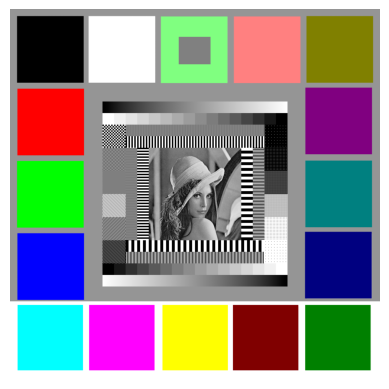

In [46]:
# carregar e processar imagem
imgTif = load_image('testpat.1k.color2.tif')
display_image(imgTif)

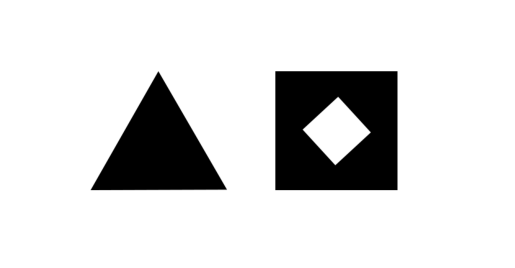

In [47]:
imgPng = load_image('Shapes.png')
display_image(imgPng)

### Questão 2

##### Letra A

Aqui a operação de filtro pontual é aplicada com as duas imagens. Vale ressaltar que são criadas cópias das imagens antes das operações para garantir que a imagem original não seja alterada por conta do gerenciamento de memória do Numpy (reutilização do objeto original, fazendo alterações por referência).

Neste caso, o filtro é aplicado nas três bandas RGB.

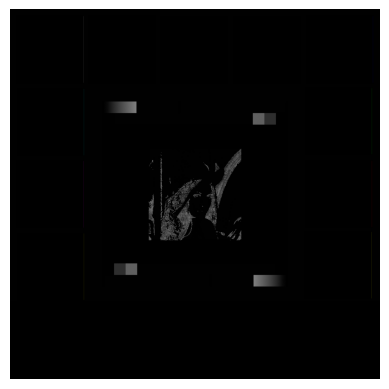

In [48]:
display_image(point_filter(imgTif.copy()))
save_image(point_filter(imgTif.copy()), "results\qt2_A_imgTif.tif")

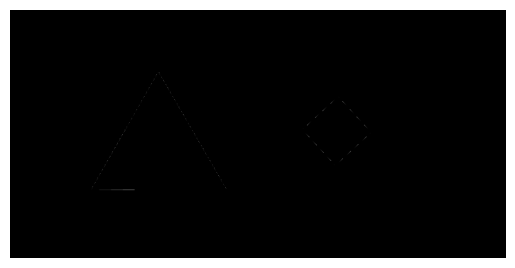

In [49]:
display_image(point_filter(imgPng.copy()))
save_image(point_filter(imgPng.copy()), "results\qt2_A_imgPng.png")

##### Letra B

Aqui a operação de filtro pontual é aplicada com as duas imagens. Vale ressaltar que são criadas cópias das imagens antes das operações para garantir que a imagem original não seja alterada por conta do gerenciamento de memória do Numpy (reutilização do objeto original, fazendo alterações por referência).

Neste caso, a imagem é convertida para YIQ e só então o filtro é aplicado nas suas bandas. Após a aplicação do filtro, a imagem volta para RGB e é salva.

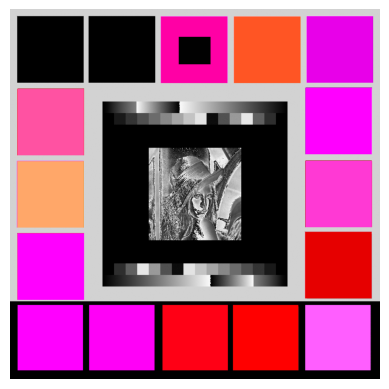

In [50]:
display_image(yiq_to_rgb(point_filter(rgb_to_yiq(imgTif.copy()))))
save_image(yiq_to_rgb(point_filter(rgb_to_yiq(imgTif.copy()))), "results\qt2_B_imgTif.tif")

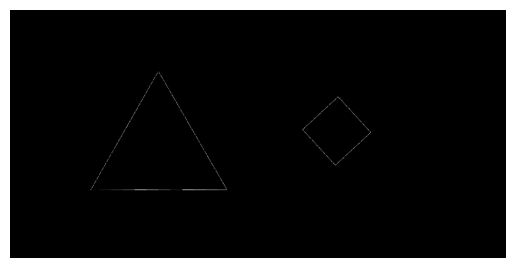

In [51]:
display_image(yiq_to_rgb(point_filter(rgb_to_yiq(imgPng.copy()))))
save_image(yiq_to_rgb(point_filter(rgb_to_yiq(imgPng.copy()))), "results\qt2_B_imgPng.png")